# Moving Cross Correl

## Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from xbbg import blp

## Helper Functions

In [26]:
def GetRet(Liste, Start = "20150101", End = pd.to_datetime("today").strftime("%Y%m%d")):
    Res = blp.bdh(tickers= [x + "1 Comdty" for x in Liste],start_date = Start , end_date = End)
    Res.columns = [x[0] for x in Res.columns]
    Ret = (np.log(Res) - np.log(Res.shift(1))).iloc[1:,:]
    return Ret

def Plot(Ret):
    print("Sharpe", np.sqrt(252) * Ret.mean()/Ret.std())
    Ret = Ret + 1
    if type(Ret) == type(pd.Series(0)):
        Ret[0] = 100
    else:
        Ret.iloc[0,0] = 100
    plt.plot(Ret.cumprod())

## Commodities

In [3]:
Commo_dict = {
    "Chicago Wheat": "W ",
    "Kansas Wheat": "KW",
    "Corn": "C ",
    "Soybeans": "S ",
    "Soybean Oil" : "BO",
    "Soybean Meal" : "SM",
    "Coffee" : "KC",
    "Orange Juice" : "JO",
    "Sugar" : "SB",
    "Cocoa" : "CC",
    "Cotton" : "CT",
    "Lean Hogs" : "LH",
    "Live Cattle"  : "LC",
    "Feeder Cattle" : "FC",
    "WTI Crude Oil" : "CL",
    "Heating Oil" : "HO",
    "RBOB Gasoline" : "XB",
    "Brent Crude Oil" : "CO",
    "Gasoil" :  "QS",
    "Natural Gas" : "NG",
    "Aluminum" : "LA",
    "Copper" : "HG",
    "Nickel" : "LN",
    "Lead" : "LL",
    "Zinc" : "LX",
    "Gold" : "GC",
    "Silver" : "SI",
    "Tin" : "LT",
    "Platinium" : "PL"
             }

## Calendars

In [ ]:
MonthCode ={1 : "F",
            2 : "G",
            3 : "H",
            4 : "J",
            5 : "K",
            6 : "M",
            7 : "N",
            8 : "Q",
            9 : "U",
            10 : "V",
            11 : "X",
            12 : "Z"}

In [1]:
GSCICalendarLetter={
        'W ': {'1':'H', '2':'H', '3':'K', '4':'K', '5':'N', '6':'N', '7':'U', '8':'U', '9':'Z', '10':'Z', '11':'Z', '12':'H'},
        'KW': {'1':'H', '2':'H', '3':'K', '4':'K', '5':'N', '6':'N', '7':'U', '8':'U', '9':'Z', '10':'Z', '11':'Z', '12':'H'},
        'C ': {'1':'H', '2':'H', '3':'K', '4':'K', '5':'N', '6':'N', '7':'U', '8':'U', '9':'Z', '10':'Z', '11':'Z', '12':'H'},
        'S ': {'1':'H', '2':'H', '3':'K', '4':'K', '5':'N', '6':'N', '7':'X', '8':'X', '9':'X', '10':'X', '11':'F', '12':'F'},
        'KC': {'1':'H', '2':'H', '3':'K', '4':'K', '5':'N', '6':'N', '7':'U', '8':'U', '9':'Z', '10':'Z', '11':'Z', '12':'H'},
        'SB': {'1':'H', '2':'H', '3':'K', '4':'K', '5':'N', '6':'N', '7':'V', '8':'V', '9':'V', '10':'H', '11':'H', '12':'H'},
        'CC': {'1':'H', '2':'H', '3':'K', '4':'K', '5':'N', '6':'N', '7':'U', '8':'U', '9':'Z', '10':'Z', '11':'Z', '12':'H'},
        'CT': {'1':'H', '2':'H', '3':'K', '4':'K', '5':'N', '6':'N', '7':'Z', '8':'Z', '9':'Z', '10':'Z', '11':'Z', '12':'H'},
        'LH': {'1':'G', '2':'J', '3':'J', '4':'M', '5':'M', '6':'N', '7':'Q', '8':'V', '9':'V', '10':'Z', '11':'Z', '12':'G'},
        'LC': {'1':'G', '2':'J', '3':'J', '4':'M', '5':'M', '6':'Q', '7':'Q', '8':'V', '9':'V', '10':'Z', '11':'Z', '12':'G'},
        'FC': {'1':'H', '2':'H', '3':'J', '4':'K', '5':'Q', '6':'Q', '7':'Q', '8':'U', '9':'V', '10':'X', '11':'F', '12':'F'},
        'CL': {'1':'G', '2':'H', '3':'J', '4':'K', '5':'M', '6':'N', '7':'Q', '8':'U', '9':'V', '10':'X', '11':'Z', '12':'F'},
        'HO': {'1':'G', '2':'H', '3':'J', '4':'K', '5':'M', '6':'N', '7':'Q', '8':'U', '9':'V', '10':'X', '11':'Z', '12':'F'},
        'XB': {'1':'G', '2':'H', '3':'J', '4':'K', '5':'M', '6':'N', '7':'Q', '8':'U', '9':'V', '10':'X', '11':'Z', '12':'F'},
        'CO': {'1':'H', '2':'J', '3':'K', '4':'M', '5':'N', '6':'Q', '7':'U', '8':'V', '9':'X', '10':'Z', '11':'F', '12':'G'},
        'QS': {'1':'G', '2':'H', '3':'J', '4':'K', '5':'M', '6':'N', '7':'Q', '8':'U', '9':'V', '10':'X', '11':'Z', '12':'F'},
        'NG': {'1':'G', '2':'H', '3':'J', '4':'K', '5':'M', '6':'N', '7':'Q', '8':'U', '9':'V', '10':'X', '11':'Z', '12':'F'},
        'LA': {'1':'G', '2':'H', '3':'J', '4':'K', '5':'M', '6':'N', '7':'Q', '8':'U', '9':'V', '10':'X', '11':'Z', '12':'F'},
        'HG': {'1':'G', '2':'H', '3':'J', '4':'K', '5':'M', '6':'N', '7':'Q', '8':'U', '9':'V', '10':'X', '11':'Z', '12':'F'},
        'LN': {'1':'G', '2':'H', '3':'J', '4':'K', '5':'M', '6':'N', '7':'Q', '8':'U', '9':'V', '10':'X', '11':'Z', '12':'F'},
        'LL': {'1':'G', '2':'H', '3':'J', '4':'K', '5':'M', '6':'N', '7':'Q', '8':'U', '9':'V', '10':'X', '11':'Z', '12':'F'},
        'LX': {'1':'G', '2':'H', '3':'J', '4':'K', '5':'M', '6':'N', '7':'Q', '8':'U', '9':'V', '10':'X', '11':'Z', '12':'F'},
        'GC': {'1':'G', '2':'J', '3':'J', '4':'M', '5':'M', '6':'Q', '7':'Q', '8':'Z', '9':'Z', '10':'Z', '11':'Z', '12':'G'},
        'SI': {'1':'H', '2':'H', '3':'K', '4':'K', '5':'N', '6':'N', '7':'U', '8':'U', '9':'Z', '10':'Z', '11':'Z', '12':'H'}
}

In [2]:
GSCICalendarNumbers = {
            'W ': {'1':'3', '2':'3', '3':'5', '4':'5', '5':'7', '6':'7', '7':'9', '8':'9', '9':'12', '10':'12', '11':'12', '12':'3'},
            'KW': {'1':'3', '2':'3', '3':'5', '4':'5', '5':'7', '6':'7', '7':'9', '8':'9', '9':'12', '10':'12', '11':'12', '12':'3'},
            'C ': {'1':'3', '2':'3', '3':'5', '4':'5', '5':'7', '6':'7', '7':'9', '8':'9', '9':'12', '10':'12', '11':'12', '12':'3'},
            'S ': {'1':'3', '2':'3', '3':'5', '4':'5', '5':'7', '6':'7', '7':'11', '8':'11', '9':'11', '10':'11', '11':'1', '12':'1'},
            'KC': {'1':'3', '2':'3', '3':'5', '4':'5', '5':'7', '6':'7', '7':'9', '8':'9', '9':'12', '10':'12', '11':'12', '12':'3'},
            'SB': {'1':'3', '2':'3', '3':'5', '4':'5', '5':'7', '6':'7', '7':'10', '8':'10', '9':'10', '10':'3', '11':'3', '12':'3'},
            'CC': {'1':'3', '2':'3', '3':'5', '4':'5', '5':'7', '6':'7', '7':'9', '8':'9', '9':'12', '10':'12', '11':'12', '12':'3'},
            'CT': {'1':'3', '2':'3', '3':'5', '4':'5', '5':'7', '6':'7', '7':'12', '8':'12', '9':'12', '10':'12', '11':'12', '12':'3'},
            'LH': {'1':'2', '2':'4', '3':'4', '4':'6', '5':'6', '6':'7', '7':'8', '8':'10', '9':'10', '10':'12', '11':'12', '12':'2'},
            'LC': {'1':'2', '2':'4', '3':'4', '4':'6', '5':'6', '6':'8', '7':'8', '8':'10', '9':'10', '10':'12', '11':'12', '12':'2'},
            'FC': {'1':'3', '2':'3', '3':'4', '4':'5', '5':'8', '6':'8', '7':'8', '8':'9', '9':'10', '10':'11', '11':'1', '12':'1'},
            'CL': {'1':'2', '2':'3', '3':'4', '4':'5', '5':'6', '6':'7', '7':'8', '8':'9', '9':'10', '10':'11', '11':'12', '12':'1'},
            'HO': {'1':'2', '2':'3', '3':'4', '4':'5', '5':'6', '6':'7', '7':'8', '8':'9', '9':'10', '10':'11', '11':'12', '12':'1'},
            'XB': {'1':'2', '2':'3', '3':'4', '4':'5', '5':'6', '6':'7', '7':'8', '8':'9', '9':'10', '10':'11', '11':'12', '12':'1'},
            'CO': {'1':'3', '2':'4', '3':'5', '4':'6', '5':'7', '6':'8', '7':'9', '8':'10', '9':'11', '10':'12', '11':'1', '12':'2'},
            'QS': {'1':'2', '2':'3', '3':'4', '4':'5', '5':'6', '6':'7', '7':'8', '8':'9', '9':'10', '10':'11', '11':'12', '12':'1'},
            'NG': {'1':'2', '2':'3', '3':'4', '4':'5', '5':'6', '6':'7', '7':'8', '8':'9', '9':'10', '10':'11', '11':'12', '12':'1'},
            'LA': {'1':'2', '2':'3', '3':'4', '4':'5', '5':'6', '6':'7', '7':'8', '8':'9', '9':'10', '10':'11', '11':'12', '12':'1'},
            'HG': {'1':'2', '2':'3', '3':'4', '4':'5', '5':'6', '6':'7', '7':'8', '8':'9', '9':'10', '10':'11', '11':'12', '12':'1'},
            'LN': {'1':'2', '2':'3', '3':'4', '4':'5', '5':'6', '6':'7', '7':'8', '8':'9', '9':'10', '10':'11', '11':'12', '12':'1'},
            'LL': {'1':'2', '2':'3', '3':'4', '4':'5', '5':'6', '6':'7', '7':'8', '8':'9', '9':'10', '10':'11', '11':'12', '12':'1'},
            'LX': {'1':'2', '2':'3', '3':'4', '4':'5', '5':'6', '6':'7', '7':'8', '8':'9', '9':'10', '10':'11', '11':'12', '12':'1'},
            'GC': {'1':'2', '2':'4', '3':'4', '4':'6', '5':'6', '6':'8', '7':'8', '8':'12', '9':'12', '10':'12', '11':'12', '12':'2'},
            'SI': {'1':'3', '2':'3', '3':'5', '4':'5', '5':'7', '6':'7', '7':'9', '8':'9', '9':'12', '10':'12', '11':'12', '12':'3'}
}

In [2]:
BCOMCalendarLetter = {
    'LA': {'1':'H', '2':'H', '3':'K', '4':'K', '5':'N', '6':'N', '7':'U', '8':'U', '9':'X', '10':'X', '11':'F', '12':'F'},
    'CC': {'1':'H', '2':'H', '3':'K', '4':'K', '5':'N', '6':'N', '7':'U', '8':'U', '9':'Z', '10':'Z', '11':'Z', '12':'H'},
    'KC': {'1':'H', '2':'H', '3':'K', '4':'K', '5':'N', '6':'N', '7':'U', '8':'U', '9':'Z', '10':'Z', '11':'Z', '12':'H'},
    'HG': {'1':'H', '2':'H', '3':'K', '4':'K', '5':'N', '6':'N', '7':'U', '8':'U', '9':'Z', '10':'Z', '11':'Z', '12':'H'},
    'C ': {'1':'H', '2':'H', '3':'K', '4':'K', '5':'N', '6':'N', '7':'U', '8':'U', '9':'Z', '10':'Z', '11':'Z', '12':'H'},
    'CT': {'1':'H', '2':'H', '3':'K', '4':'K', '5':'N', '6':'N', '7':'Z', '8':'Z', '9':'Z', '10':'Z', '11':'Z', '12':'H'},
    'CO': {'1':'H', '2':'K', '3':'K', '4':'N', '5':'N', '6':'U', '7':'U', '8':'X', '9':'X', '10':'F', '11':'F', '12':'H'},
    'CL': {'1':'H', '2':'H', '3':'K', '4':'K', '5':'N', '6':'N', '7':'U', '8':'U', '9':'X', '10':'X', '11':'F', '12':'F'},
    'FC': {'1':'H', '2':'H', '3':'K', '4':'K', '5':'Q', '6':'Q', '7':'Q', '8':'V', '9':'V', '10':'F', '11':'F', '12':'F'},
    'QS': {'1':'H', '2':'H', '3':'K', '4':'K', '5':'N', '6':'N', '7':'U', '8':'U', '9':'X', '10':'X', '11':'F', '12':'F'},
    'GC': {'1':'G', '2':'J', '3':'J', '4':'M', '5':'M', '6':'Q', '7':'Q', '8':'Z', '9':'Z', '10':'Z', '11':'Z', '12':'G'},
    'HO': {'1':'H', '2':'H', '3':'K', '4':'K', '5':'N', '6':'N', '7':'U', '8':'U', '9':'X', '10':'X', '11':'F', '12':'F'},
    'LL': {'1':'H', '2':'H', '3':'K', '4':'K', '5':'N', '6':'N', '7':'U', '8':'U', '9':'X', '10':'X', '11':'F', '12':'F'},
    'LH': {'1':'G', '2':'J', '3':'J', '4':'M', '5':'M', '6':'N', '7':'Q', '8':'V', '9':'V', '10':'Z', '11':'Z', '12':'G'},
    'LC': {'1':'G', '2':'J', '3':'J', '4':'M', '5':'M', '6':'Q', '7':'Q', '8':'V', '9':'V', '10':'Z', '11':'Z', '12':'G'},
    'NG': {'1':'H', '2':'H', '3':'K', '4':'K', '5':'N', '6':'N', '7':'U', '8':'U', '9':'X', '10':'X', '11':'F', '12':'F'},
    'LN': {'1':'H', '2':'H', '3':'K', '4':'K', '5':'N', '6':'N', '7':'U', '8':'U', '9':'X', '10':'X', '11':'F', '12':'F'},
    'JO': {'1':'H', '2':'H', '3':'K', '4':'K', '5':'N', '6':'N', '7':'U', '8':'U', '9':'X', '10':'X', '11':'F', '12':'F'},
    'PL': {'1':'J', '2':'J', '3':'J', '4':'N', '5':'N', '6':'N', '7':'V', '8':'V', '9':'V', '10':'F', '11':'F', '12':'F'},
    'SI': {'1':'H', '2':'H', '3':'K', '4':'K', '5':'N', '6':'N', '7':'U', '8':'U', '9':'Z', '10':'Z', '11':'Z', '12':'H'},
    'SM': {'1':'H', '2':'H', '3':'K', '4':'K', '5':'N', '6':'N', '7':'Z', '8':'Z', '9':'Z', '10':'Z', '11':'F', '12':'F'},
    'BO': {'1':'H', '2':'H', '3':'K', '4':'K', '5':'N', '6':'N', '7':'Z', '8':'Z', '9':'Z', '10':'Z', '11':'F', '12':'F'},
    'S ': {'1':'H', '2':'H', '3':'K', '4':'K', '5':'N', '6':'N', '7':'X', '8':'X', '9':'X', '10':'X', '11':'F', '12':'F'},
    'SB': {'1':'H', '2':'H', '3':'K', '4':'K', '5':'N', '6':'N', '7':'V', '8':'V', '9':'V', '10':'H', '11':'H', '12':'H'},
    'LT': {'1':'H', '2':'H', '3':'K', '4':'K', '5':'N', '6':'N', '7':'U', '8':'U', '9':'X', '10':'X', '11':'F', '12':'F'},
    'XB': {'1':'H', '2':'H', '3':'K', '4':'K', '5':'N', '6':'N', '7':'U', '8':'U', '9':'X', '10':'X', '11':'F', '12':'F'},
    'W ': {'1':'H', '2':'H', '3':'K', '4':'K', '5':'N', '6':'N', '7':'U', '8':'U', '9':'Z', '10':'Z', '11':'Z', '12':'H'},
    'LX': {'1':'H', '2':'H', '3':'K', '4':'K', '5':'N', '6':'N', '7':'U', '8':'U', '9':'X', '10':'X', '11':'F', '12':'F'}
    }

In [3]:
BCOMCalendarNumbers = {
    'LA': {'1':'3', '2':'3', '3':'5', '4':'5', '5':'7', '6':'7', '7':'9', '8':'9', '9':'11', '10':'11', '11':'1', '12':'1'},
    'CC': {'1':'3', '2':'3', '3':'5', '4':'5', '5':'7', '6':'7', '7':'9', '8':'9', '9':'12', '10':'12', '11':'12', '12':'3'},
    'KC': {'1':'3', '2':'3', '3':'5', '4':'5', '5':'7', '6':'7', '7':'9', '8':'9', '9':'12', '10':'12', '11':'12', '12':'3'},
    'HG': {'1':'3', '2':'3', '3':'5', '4':'5', '5':'7', '6':'7', '7':'9', '8':'9', '9':'12', '10':'12', '11':'12', '12':'3'},
    'C ': {'1':'3', '2':'3', '3':'5', '4':'5', '5':'7', '6':'7', '7':'9', '8':'9', '9':'12', '10':'12', '11':'12', '12':'3'},
    'CT': {'1':'3', '2':'3', '3':'5', '4':'5', '5':'7', '6':'7', '7':'12', '8':'12', '9':'12', '10':'12', '11':'12', '12':'3'},
    'CO': {'1':'3', '2':'5', '3':'5', '4':'7', '5':'7', '6':'9', '7':'9', '8':'11', '9':'11', '10':'1', '11':'1', '12':'3'},
    'CL': {'1':'3', '2':'3', '3':'5', '4':'5', '5':'7', '6':'7', '7':'9', '8':'9', '9':'11', '10':'11', '11':'1', '12':'1'},
    'FC': {'1':'3', '2':'3', '3':'5', '4':'5', '5':'8', '6':'8', '7':'8', '8':'10', '9':'10', '10':'1', '11':'1', '12':'1'},
    'QS': {'1':'3', '2':'3', '3':'5', '4':'5', '5':'7', '6':'7', '7':'9', '8':'9', '9':'11', '10':'11', '11':'1', '12':'1'},
    'GC': {'1':'2', '2':'4', '3':'4', '4':'6', '5':'6', '6':'8', '7':'8', '8':'12', '9':'12', '10':'12', '11':'12', '12':'2'},
    'HO': {'1':'3', '2':'3', '3':'5', '4':'5', '5':'7', '6':'7', '7':'9', '8':'9', '9':'11', '10':'11', '11':'1', '12':'1'},
    'LL': {'1':'3', '2':'3', '3':'5', '4':'5', '5':'7', '6':'7', '7':'9', '8':'9', '9':'11', '10':'11', '11':'1', '12':'1'},
    'LH': {'1':'2', '2':'4', '3':'4', '4':'6', '5':'6', '6':'7', '7':'8', '8':'10', '9':'10', '10':'12', '11':'12', '12':'2'},
    'LC': {'1':'2', '2':'4', '3':'4', '4':'6', '5':'6', '6':'8', '7':'8', '8':'10', '9':'10', '10':'12', '11':'12', '12':'2'},
    'NG': {'1':'3', '2':'3', '3':'5', '4':'5', '5':'7', '6':'7', '7':'9', '8':'9', '9':'11', '10':'11', '11':'1', '12':'1'},
    'LN': {'1':'3', '2':'3', '3':'5', '4':'5', '5':'7', '6':'7', '7':'9', '8':'9', '9':'11', '10':'11', '11':'1', '12':'1'},
    'JO': {'1':'3', '2':'3', '3':'5', '4':'5', '5':'7', '6':'7', '7':'9', '8':'9', '9':'11', '10':'11', '11':'1', '12':'1'},
    'PL': {'1':'4', '2':'4', '3':'4', '4':'7', '5':'7', '6':'7', '7':'10', '8':'10', '9':'10', '10':'1', '11':'1', '12':'1'},
    'SI': {'1':'3', '2':'3', '3':'5', '4':'5', '5':'7', '6':'7', '7':'9', '8':'9', '9':'12', '10':'12', '11':'12', '12':'3'},
    'SM': {'1':'3', '2':'3', '3':'5', '4':'5', '5':'7', '6':'7', '7':'12', '8':'12', '9':'12', '10':'12', '11':'1', '12':'1'},
    'BO': {'1':'3', '2':'3', '3':'5', '4':'5', '5':'7', '6':'7', '7':'12', '8':'12', '9':'12', '10':'12', '11':'1', '12':'1'},
    'S ': {'1':'3', '2':'3', '3':'5', '4':'5', '5':'7', '6':'7', '7':'11', '8':'11', '9':'11', '10':'11', '11':'1', '12':'1'},
    'SB': {'1':'3', '2':'3', '3':'5', '4':'5', '5':'7', '6':'7', '7':'10', '8':'10', '9':'10', '10':'3', '11':'3', '12':'3'},
    'LT': {'1':'3', '2':'3', '3':'5', '4':'5', '5':'7', '6':'7', '7':'9', '8':'9', '9':'11', '10':'11', '11':'1', '12':'1'},
    'XB': {'1':'3', '2':'3', '3':'5', '4':'5', '5':'7', '6':'7', '7':'9', '8':'9', '9':'11', '10':'11', '11':'1', '12':'1'},
    'W ': {'1':'3', '2':'3', '3':'5', '4':'5', '5':'7', '6':'7', '7':'9', '8':'9', '9':'12', '10':'12', '11':'12', '12':'3'},
    'LX': {'1':'3', '2':'3', '3':'5', '4':'5', '5':'7', '6':'7', '7':'9', '8':'9', '9':'11', '10':'11', '11':'1', '12':'1'}
}

# Pair Correl Function

In [42]:
def PairCorrel(Pair, Window = 252, Start = "20150101", End = pd.to_datetime("today").strftime("%Y%m%d")):
    Res = GetRet(Pair, Start = Start, End = End)
    Res.columns = [x.split(" ")[0] for x in Res.columns]
    df = {}
    for x in range(len(Res) - Window):
        df[Res.index[x+Window]] = Res.iloc[x:x+Window,:].corr().iloc[0,1]
    
    plt.plot(pd.Series(df))
    plt.xticks(rotation=45)
    plt.show()
    return "Plot!"
    

    

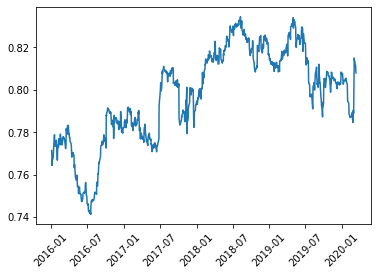

In [44]:
df = PairCorrel(["GC", "SI"])

In [5]:
set(list(GSCICalendarLetter.keys()) + list(BCOMCalendarLetter))

{'BO',
 'C ',
 'CC',
 'CL',
 'CO',
 'CT',
 'FC',
 'GC',
 'HG',
 'HO',
 'JO',
 'KC',
 'KW',
 'LA',
 'LC',
 'LH',
 'LL',
 'LN',
 'LT',
 'LX',
 'NG',
 'PL',
 'QS',
 'S ',
 'SB',
 'SI',
 'SM',
 'W ',
 'XB'}

In [5]:
blp.bdib(ticker='GCA Comdty', dt="20200611")

2020-06-12 15:50:24,775:xbbg.const.exch_info:ERROR:required exchange info cannot be found in GCA Comdty ...


""
